# Plot map regarding sociodemographic clusters

In [1]:
import pandas as pd
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import pathlib
from PIL import Image

from util import centimeter_to_inch, get_default_colors_maps

## Loading data

In [2]:
df_labeled_clusters = pd.read_csv('data/output/df_labeled_cluster.csv', index_col=0)
df_labeled_clusters['cluster_label'].unique()

array(['Semi-urbanized', 'Urbanized', 'Rural with high human development',
       'Urbanized with informal settlements',
       'Rural with low human development'], dtype=object)

In [3]:
df_labeled_clusters.loc[df_labeled_clusters['cluster_label'] == 'Urbanized with informal settlements', 'cluster_label'] = 'Urbanized with \ninformal settlements'
df_labeled_clusters.loc[df_labeled_clusters['cluster_label'] == 'Rural with high human development', 'cluster_label'] = 'Rural with high \nhuman development'
df_labeled_clusters.loc[df_labeled_clusters['cluster_label'] == 'Rural with low human development', 'cluster_label'] = 'Rural with low \nhuman development'

In [4]:
labels_sorted = ['Urbanized','Urbanized with \ninformal settlements','Semi-urbanized','Rural with high \nhuman development','Rural with low \nhuman development']

In [5]:
try:
    filename_map_municipalities = 'data/output/map_municipalities_2010.geojson'
    path_map_municipalities = pathlib.Path(filename_map_municipalities)
    map_municipalities = gpd.read_file(path_map_municipalities)

    filename_map_states = 'data/output/map_states_2010.geojson'
    path_map_states = pathlib.Path(filename_map_states)
    map_states = gpd.read_file(path_map_states)
except:
    map_municipalities = geobr.read_municipality(year=2010)
    map_states =  geobr.read_state(year=2010)
    map_municipalities.to_file('data/output/map_municipalities_2010.geojson', driver='GeoJSON')
    map_states.to_file('data/output/map_states_2010.geojson', driver='GeoJSON')

In [6]:
map_municipalities.code_muni = map_municipalities.code_muni.astype('Int64')
df_map_municipalities = map_municipalities.merge(df_labeled_clusters, how="left", left_on="code_muni", right_on="code_municipality_7")

In [7]:
df_map_municipalities.loc[(df_map_municipalities['name_muni'].isin(['Lagoa Mirim', 'Lagoa Dos Patos']) == True)]

,code_muni,name_muni,code_state,abbrev_state,geometry,code_municipality_7,cluster,cluster_label
2669,3137304,Lagoa Dos Patos,31.0,MG,"MULTIPOLYGON (((-44.51250 -16.94176, -44.50472...",3137304.0,0.0,Semi-urbanized
4603,4300001,Lagoa Mirim,43.0,RS,"MULTIPOLYGON (((-52.62242 -32.14398, -52.62241...",NaN,NaN,NaN
4604,4300002,Lagoa Dos Patos,43.0,RS,"MULTIPOLYGON (((-52.08379 -32.18861, -52.08731...",NaN,NaN,NaN


In [8]:
df_map_municipalities = df_map_municipalities.loc[df_map_municipalities.index.isin([4603,4604])==False]

In [9]:
len(df_map_municipalities)

5565

## Ploting map

In [10]:
custom_points = {}

point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
point = Point(point.x, point.y - 2.2)
custom_points['RJ'] = point

point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
point = Point(point.x + 0.6, point.y - 0.8)
custom_points['SC'] = point

point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
point = Point(point.x + 2.1, point.y - 1)
custom_points['ES'] = point

point = map_states[map_states.abbrev_state == 'SE'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1.5)
custom_points['SE'] = point

point = map_states[map_states.abbrev_state == 'AL'].geometry.centroid.values[0]
point = Point(point.x + 1.8, point.y - 1)
custom_points['AL'] = point

point = map_states[map_states.abbrev_state == 'PE'].geometry.centroid.values[0]
point = Point(point.x + 4.1, point.y - 0.7)
custom_points['PE'] = point

point = map_states[map_states.abbrev_state == 'PB'].geometry.centroid.values[0]
point = Point(point.x + 3.1, point.y - 0.5)
custom_points['PB'] = point

point = map_states[map_states.abbrev_state == 'RN'].geometry.centroid.values[0]
point = Point(point.x + 2.8, point.y)
custom_points['RN'] = point

point = map_states[map_states.abbrev_state == 'PI'].geometry.centroid.values[0]
point = Point(point.x + 1, point.y)
custom_points['PI'] = point

point = map_states[map_states.abbrev_state == 'DF'].geometry.centroid.values[0]
point = Point(point.x, point.y + 0.35)
custom_points['DF'] = point

point = map_states[map_states.abbrev_state == 'GO'].geometry.centroid.values[0]
point = Point(point.x, point.y - 1.4)
custom_points['GO'] = point

point = map_states[map_states.abbrev_state == 'AC'].geometry.centroid.values[0]
point = Point(point.x, point.y - 0.4)
custom_points['AC'] = point

<ipython-input-10-14fc443e71bc>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'RJ'].geometry.centroid.values[0]
<ipython-input-10-14fc443e71bc>:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'SC'].geometry.centroid.values[0]
<ipython-input-10-14fc443e71bc>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = map_states[map_states.abbrev_state == 'ES'].geometry.centroid.values[0]
<ipython-input-10-14fc443e71bc>:15: UserWarning: Geometry is in a geographic CRS. Results fro

In [30]:
def replace_legend_items(legend, sorted_labels):
    for txt in legend.texts:
        for i in range(len(sorted_labels)):
            if txt.get_text() == str(i):
                txt.set_text(sorted_labels[i])

def plot_map_clusters(df, column, analysis='general'):        
    for i in range(len(labels_sorted)):
        label = labels_sorted[i]
        df.loc[df[column] == label, 'order_cluster'] = str(i)

    linewidth_estados = 0.4
    # linewidth_municipios = linewidth_estados * 0.000001
    linewidth_municipios = 0

    sns.set(font_scale=1.1)
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(centimeter_to_inch(17.4), centimeter_to_inch(17.4)))

    missing_kwds = dict(color='grey', label='No data')

    df.plot(
        column='order_cluster',
        legend=True,
        cmap=get_default_colors_maps(5),
        legend_kwds={'loc': 'lower left', 'ncol': 1, 'bbox_to_anchor': (-0.075, 0)},
        edgecolor="gray",
        linewidth=linewidth_municipios,
        categorical=True,
        missing_kwds=missing_kwds,
        ax=ax
    )

    map_states.boundary.plot(edgecolor="black", linewidth=linewidth_estados, ax=ax)

    map_states[map_states.abbrev_state.isin(['RJ', 'SC', 'ES', 'SE', 'AL', 'PE', 'PB', 'RN', 'DF', 'GO', 'PI', 'AC']) == False].apply(lambda x: ax.annotate(text=x.abbrev_state, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);

    for ponto in custom_points.keys():
        ax.text(custom_points[ponto].x, custom_points[ponto].y, ponto, ha='center')

    ax.axis("off")
    
    fig.tight_layout()
    
    replace_legend_items(ax.get_legend(), labels_sorted)    
    fig.savefig('images/map_risk_factors_'+analysis+'.png', bbox_inches="tight")
    fig.savefig('images/map_risk_factors_'+analysis+'.pdf', bbox_inches="tight")
    fig.savefig('images/map_risk_factors_'+analysis+'.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
    img = Image.open('images/map_risk_factors_'+analysis+'.tiff')
    img.save('images/map_risk_factors_'+analysis+'_compressed.tiff', compression="tiff_lzw")    
    plt.show()

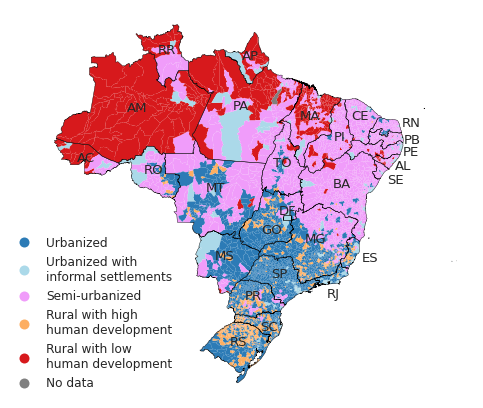

In [31]:
plot_map_clusters(df_map_municipalities, 'cluster_label')

In [13]:
df_map_municipalities

,code_muni,name_muni,code_state,abbrev_state,geometry,code_municipality_7,cluster,cluster_label,order_cluster
0,1100015,Alta Floresta D'oeste,11.0,RO,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151...",1100015.0,0.0,Semi-urbanized,2
1,1100023,Ariquemes,11.0,RO,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ...",1100023.0,4.0,Urbanized,0
2,1100031,Cabixi,11.0,RO,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161...",1100031.0,1.0,Rural with high \nhuman development,3
3,1100049,Cacoal,11.0,RO,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900...",1100049.0,4.0,Urbanized,0
4,1100056,Cerejeiras,11.0,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603...",1100056.0,4.0,Urbanized,0
...,...,...,...,...,...,...,...,...,...
5562,5222005,Vianópolis,52.0,GO,"POLYGON ((-48.54164 -16.74126, -48.53274 -16.7...",5222005.0,4.0,Urbanized,0
5563,5222054,Vicentinópolis,52.0,GO,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...",5222054.0,4.0,Urbanized,0
5564,5222203,Vila Boa,52.0,GO,"POLYGON ((-46.97635 -14.93112, -46.94801 -15.0...",5222203.0,0.0,Semi-urbanized,2
5565,5222302,Vila Propício,52.0,GO,"POLYGON ((-48.86700 -15.09735, -48.86191 -15.0...",5222302.0,0.0,Semi-urbanized,2


In [14]:
df_base = pd.read_csv('data/output/df_dataset.csv', index_col=0)

In [15]:
df_base

,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,...,percentage_self_employed_workers,unemployment_rate,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18
0,1100015,Alta Floresta D'Oeste (RO),21495,-11.935540,-61.999824,29.276576,29.309142,26.871365,14.538265,57.272876,...,34.73,6.07,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67
1,1100023,Ariquemes (RO),96833,-9.908463,-63.033269,29.736763,33.135398,25.601809,11.526029,84.695583,...,27.66,5.11,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18
2,1100031,Cabixi (RO),5363,-13.499763,-60.544314,27.428678,24.855491,28.305053,19.187022,42.658007,...,32.98,2.90,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09
3,1100049,Cacoal (RO),86895,-11.433865,-61.442944,27.389378,33.099718,26.171817,13.329881,78.805966,...,24.97,6.28,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74
4,1100056,Cerejeiras (RO),15890,-13.195033,-60.818426,28.445563,30.780365,26.085588,14.688483,84.673205,...,28.46,5.72,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,Vianópolis (GO),14956,-16.742081,-48.513471,27.360257,29.459749,28.450120,14.729874,73.079375,...,26.44,4.03,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11
5566,5222054,Vicentinópolis (GO),8768,-17.732662,-49.807239,28.592609,32.744069,26.881843,11.781478,85.754986,...,17.41,6.23,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07
5567,5222203,Vila Boa (GO),4215,-15.034889,-47.057361,33.618031,29.822064,24.578885,11.981020,73.959873,...,13.70,8.93,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49
5568,5222302,Vila Propício (GO),5815,-15.454635,-48.882422,28.323302,26.672399,29.062769,15.941531,29.232264,...,23.59,4.46,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46


In [16]:
df_base = df_base.merge(df_labeled_clusters, how='right', on='code_municipality_7')

In [17]:
df_base

,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,...,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18,cluster,cluster_label
0,1100015,Alta Floresta D'Oeste (RO),21495,-11.935540,-61.999824,29.276576,29.309142,26.871365,14.538265,57.272876,...,58.32,1.15,38.56,13.78,33.18,3.26,8.41,8.67,0,Semi-urbanized
1,1100023,Ariquemes (RO),96833,-9.908463,-63.033269,29.736763,33.135398,25.601809,11.526029,84.695583,...,47.19,0.16,14.97,17.99,40.06,9.10,5.92,9.18,4,Urbanized
2,1100031,Cabixi (RO),5363,-13.499763,-60.544314,27.428678,24.855491,28.305053,19.187022,42.658007,...,60.62,0.65,45.49,6.46,36.91,3.98,10.18,10.09,1,Rural with high \nhuman development
3,1100049,Cacoal (RO),86895,-11.433865,-61.442944,27.389378,33.099718,26.171817,13.329881,78.805966,...,44.93,0.43,19.69,19.00,39.07,10.43,6.29,9.74,4,Urbanized
4,1100056,Cerejeiras (RO),15890,-13.195033,-60.818426,28.445563,30.780365,26.085588,14.688483,84.673205,...,54.46,0.38,26.67,14.08,38.39,6.87,7.85,10.22,4,Urbanized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,5222005,Vianópolis (GO),14956,-16.742081,-48.513471,27.360257,29.459749,28.450120,14.729874,73.079375,...,50.59,1.23,24.67,13.05,38.80,13.71,6.55,10.11,4,Urbanized
5556,5222054,Vicentinópolis (GO),8768,-17.732662,-49.807239,28.592609,32.744069,26.881843,11.781478,85.754986,...,41.65,1.55,32.41,10.67,34.51,16.29,9.13,10.07,4,Urbanized
5557,5222203,Vila Boa (GO),4215,-15.034889,-47.057361,33.618031,29.822064,24.578885,11.981020,73.959873,...,38.76,1.74,26.76,7.35,31.03,14.85,12.83,10.49,0,Semi-urbanized
5558,5222302,Vila Propício (GO),5815,-15.454635,-48.882422,28.323302,26.672399,29.062769,15.941531,29.232264,...,62.74,0.20,47.74,5.17,28.96,6.97,14.32,9.46,0,Semi-urbanized


In [18]:
len(df_base[(df_base.municipality.str.contains('(PA)'))])

<ipython-input-18-d41a2602e9e0>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  len(df_base[(df_base.municipality.str.contains('(PA)'))])


142

In [19]:
df_base[(df_base.municipality.str.contains('(MG)')) & (df_base.cluster_label == 'Urbanized with informal settlements')]

<ipython-input-19-0f46c4ba75af>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_base[(df_base.municipality.str.contains('(MG)')) & (df_base.cluster_label == 'Urbanized with informal settlements')]


,code_municipality_7,municipality,population,latitude,longitude,percentage_population_age_range_0_19,percentage_population_age_range_20_39,percentage_population_age_range_40_59,percentage_population_age_range_60_more,percentage_urban_population,...,percentage_informal_workers,percentage_poor_population_spending_more_1_hour_to_work,percentage_workers_agriculture,percentage_workers_commerce,percentage_workers_services,percentage_workers_industry,illiteracy_rate,expected_years_of_schooling_at_age_18,cluster,cluster_label


In [20]:
df_base.drop(columns=['municipality','cluster_label'])[df_base['cluster_label'] == 'Urbanized with informal settlements'].mean().round(2)

code_municipality_7                                                NaN
population                                                         NaN
latitude                                                           NaN
longitude                                                          NaN
percentage_population_age_range_0_19                               NaN
percentage_population_age_range_20_39                              NaN
percentage_population_age_range_40_59                              NaN
percentage_population_age_range_60_more                            NaN
percentage_urban_population                                        NaN
demographic_density                                                NaN
average_residents_per_households                                   NaN
percentage_population_in_households_more_2_residents_per_bedroom   NaN
percentage_male_population                                         NaN
percentage_indigenous_population                                   NaN
percen

In [21]:
df_base.drop(columns=['municipality','cluster_label'])[df_base['cluster_label'] == 'Urbanized'].mean().round(2)

code_municipality_7                                                 3794580.15
population                                                            31966.65
latitude                                                                -21.73
longitude                                                               -48.67
percentage_population_age_range_0_19                                     25.25
percentage_population_age_range_20_39                                    28.82
percentage_population_age_range_40_59                                    27.54
percentage_population_age_range_60_more                                  18.41
percentage_urban_population                                              81.08
demographic_density                                                      83.11
average_residents_per_households                                          2.70
percentage_population_in_households_more_2_residents_per_bedroom         18.21
percentage_male_population                          

In [22]:
df_base.drop(columns=['municipality','cluster_label'])[df_base['cluster_label'] == 'Urbanized with informal settlements'].median().round(2)

code_municipality_7                                                NaN
population                                                         NaN
latitude                                                           NaN
longitude                                                          NaN
percentage_population_age_range_0_19                               NaN
percentage_population_age_range_20_39                              NaN
percentage_population_age_range_40_59                              NaN
percentage_population_age_range_60_more                            NaN
percentage_urban_population                                        NaN
demographic_density                                                NaN
average_residents_per_households                                   NaN
percentage_population_in_households_more_2_residents_per_bedroom   NaN
percentage_male_population                                         NaN
percentage_indigenous_population                                   NaN
percen

In [23]:
df_base.drop(columns=['municipality','cluster_label'])[df_base['cluster_label'] == 'Urbanized'].median().round(2)

code_municipality_7                                                 3541653.50
population                                                            13976.50
latitude                                                                -21.83
longitude                                                               -49.24
percentage_population_age_range_0_19                                     25.12
percentage_population_age_range_20_39                                    28.66
percentage_population_age_range_40_59                                    27.56
percentage_population_age_range_60_more                                  18.46
percentage_urban_population                                              82.90
demographic_density                                                      32.92
average_residents_per_households                                          2.70
percentage_population_in_households_more_2_residents_per_bedroom         17.60
percentage_male_population                          

In [24]:
df_base[df_base['cluster_label'] == 'Urbanized with informal settlements'][['municipality','percentage_urban_population', 'demographic_density','percentage_estimated_households_in_informal_settlements', 'percentage_population_in_informal_settlements','demographic_density_in_informal_settlements']]

,municipality,percentage_urban_population,demographic_density,percentage_estimated_households_in_informal_settlements,percentage_population_in_informal_settlements,demographic_density_in_informal_settlements


In [25]:
df_base[df_base['cluster_label'] == 'Urbanized'][['municipality','percentage_urban_population', 'demographic_density','percentage_estimated_households_in_informal_settlements', 'percentage_population_in_informal_settlements','demographic_density_in_informal_settlements']]

,municipality,percentage_urban_population,demographic_density,percentage_estimated_households_in_informal_settlements,percentage_population_in_informal_settlements,demographic_density_in_informal_settlements
1,Ariquemes (RO),84.695583,21.88,0.308684,0.0,0.0
3,Cacoal (RO),78.805966,22.91,1.907881,0.0,0.0
4,Cerejeiras (RO),84.673205,5.71,0.000000,0.0,0.0
5,Colorado do Oeste (RO),73.460276,10.79,0.000000,0.0,0.0
8,Espigão D'Oeste (RO),71.739357,6.51,0.000000,0.0,0.0
...,...,...,...,...,...,...
5550,Uruaçu (GO),91.516153,19.86,0.942302,0.0,0.0
5551,Uruana (GO),81.238247,26.26,0.000000,0.0,0.0
5552,Urutaí (GO),70.331815,5.70,0.000000,0.0,0.0
5555,Vianópolis (GO),73.079375,15.68,0.000000,0.0,0.0


In [26]:
len(df_base[(df_base['cluster_label'] == 'Urbanized') & (df_base['percentage_estimated_households_in_informal_settlements']>0)])/len(df_base[(df_base['cluster_label'] == 'Urbanized')])*100

14.994984954864593